# Classifying Post Engagement on Social Media Platforms - Data Wrangling

## Importing libraries and understanding data structures

In [4]:
import kagglehub
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
path = kagglehub.dataset_download("atharvasoundankar/viral-social-media-trends-and-engagement-analysis")

print("Path to dataset files:", path)

Path to dataset files: /Users/lupecovarrubias/.cache/kagglehub/datasets/atharvasoundankar/viral-social-media-trends-and-engagement-analysis/versions/2


In [6]:
print(os.listdir(path))

['Cleaned_Viral_Social_Media_Trends.csv', 'Viral_Social_Media_Trends.csv']


In [7]:
file_path = os.path.join(path, "Viral_Social_Media_Trends.csv")

In [8]:
df = pd.read_csv(file_path)
print(df.head())

  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [10]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


## Exploring the data

In [12]:
df['Platform'].value_counts()

Platform
YouTube      1324
TikTok       1260
Instagram    1212
Twitter      1204
Name: count, dtype: int64

In [13]:
df['Engagement_Level'].value_counts()

Engagement_Level
Low       1729
High      1673
Medium    1598
Name: count, dtype: int64

In [14]:
df['Hashtag'].value_counts()

Hashtag
#Fitness      536
#Education    525
#Challenge    507
#Comedy       505
#Dance        496
#Music        493
#Tech         491
#Fashion      487
#Viral        481
#Gaming       479
Name: count, dtype: int64

In [15]:
df['Content_Type'].value_counts()

Content_Type
Live Stream    855
Post           853
Reel           841
Tweet          836
Video          828
Shorts         787
Name: count, dtype: int64

In [16]:
df['Region'].value_counts()

Region
USA          677
Canada       658
UK           647
Brazil       641
India        617
Australia    602
Japan        592
Germany      566
Name: count, dtype: int64

/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

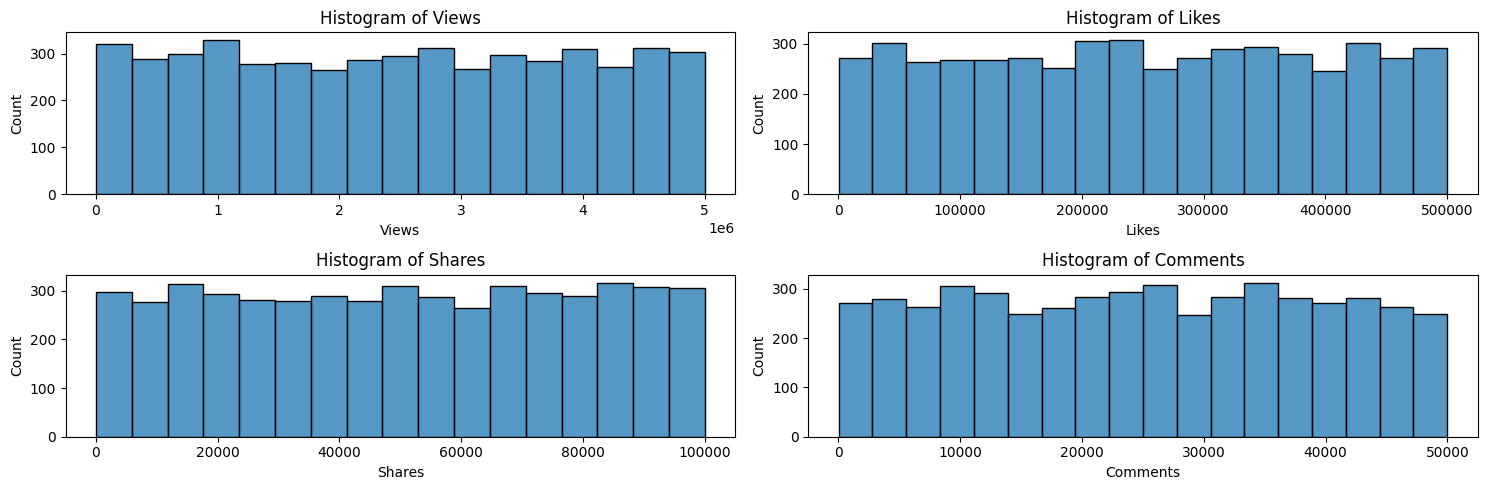

In [17]:
df_nums = df[['Views', 'Likes', 'Shares', 'Comments']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5)) 
axes = axes.flatten()
for i, column in enumerate(df_nums.columns):
    sns.histplot(data=df_nums, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout() 
plt.show()

The histograms of the numerical values shows that overall there is an even distribution of engagement across types of engagement. No one metric is heavily skewed which will be helpful for modeling later but scaling is probably still necessary since the features exist on different numeric scales.

In [19]:
#check for duplicates
columns = ['Post_ID', 'Platform','Content_Type']
duplicates = df.duplicated(subset = columns, keep = False)
df[duplicates].sort_values(by = 'Post_ID')

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level


# Exploratory Data Analysis

<Axes: xlabel='Engagement_Level', ylabel='count'>

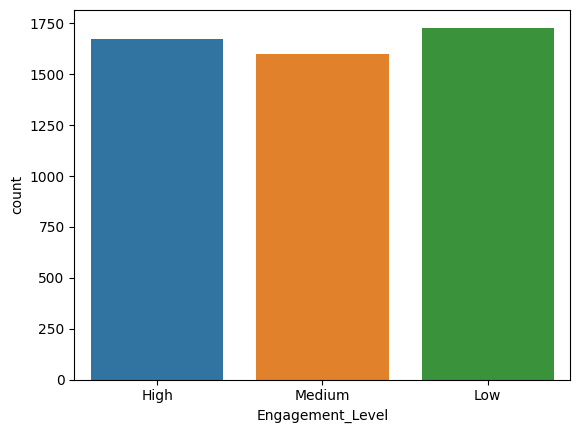

In [21]:
sns.countplot(x='Engagement_Level', data=df)

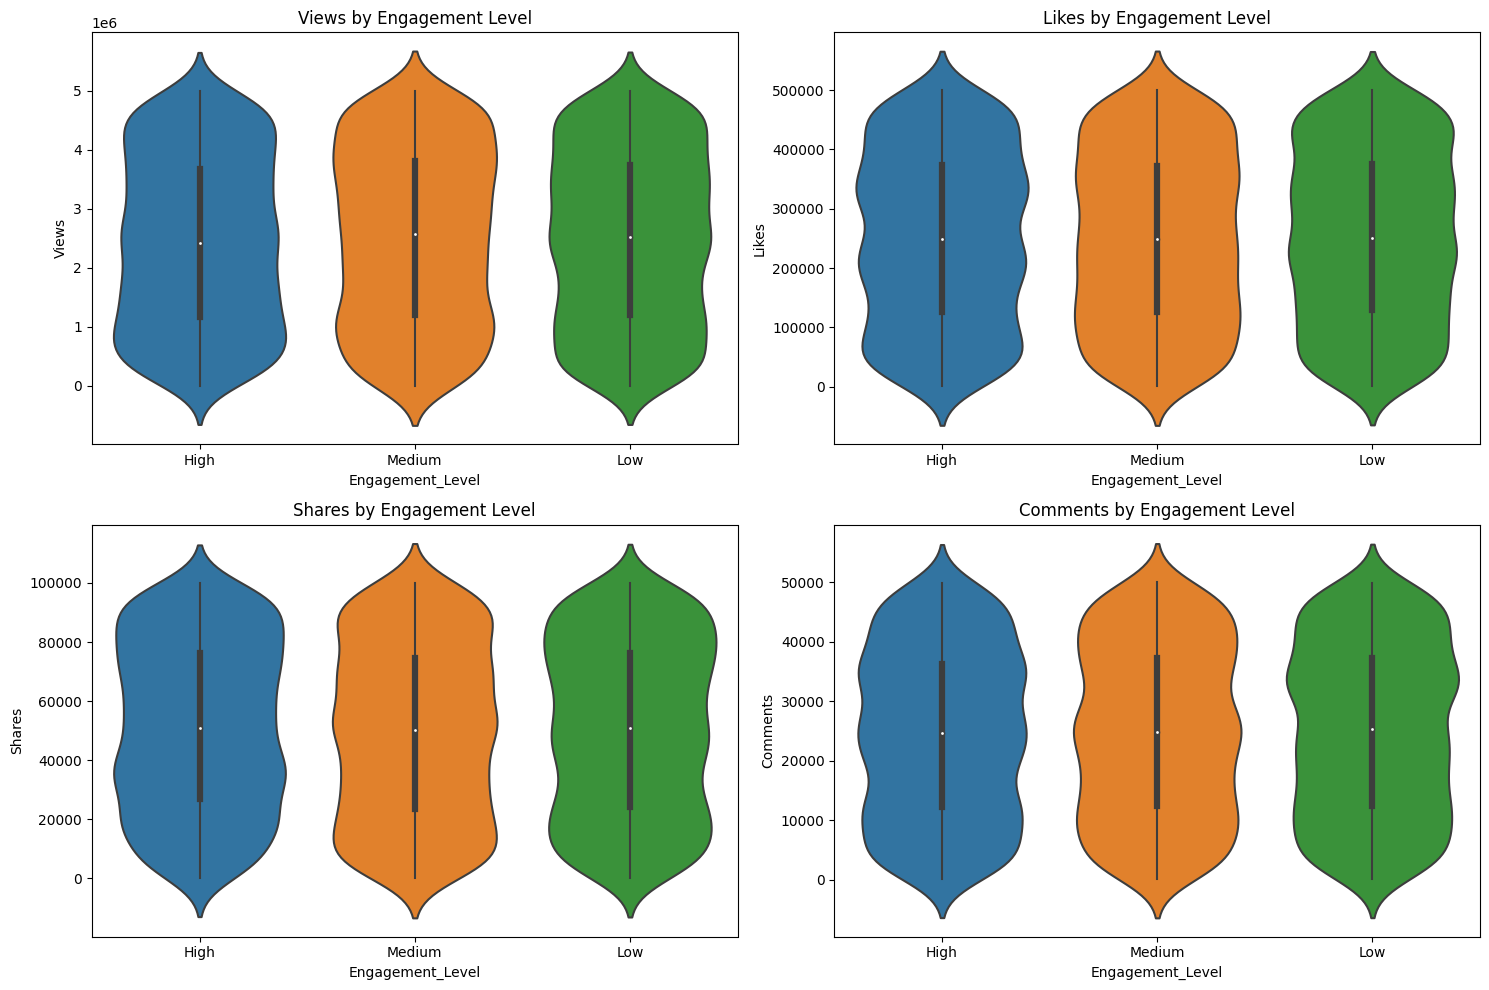

In [22]:
num_feat = ['Views', 'Likes', 'Shares', 'Comments']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Use df as the data, not num_feat
for i, col in enumerate(num_feat):
    sns.violinplot(x='Engagement_Level', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Engagement Level')

plt.tight_layout()
plt.show()

As we can see from the violin plots, no single metric alone fully separates the engagement levels. Comments and likes seem to have slightly stronger signals compare to views or shares. We will need to explore other features to get a more accurate prediction of the engagement level.

/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/p

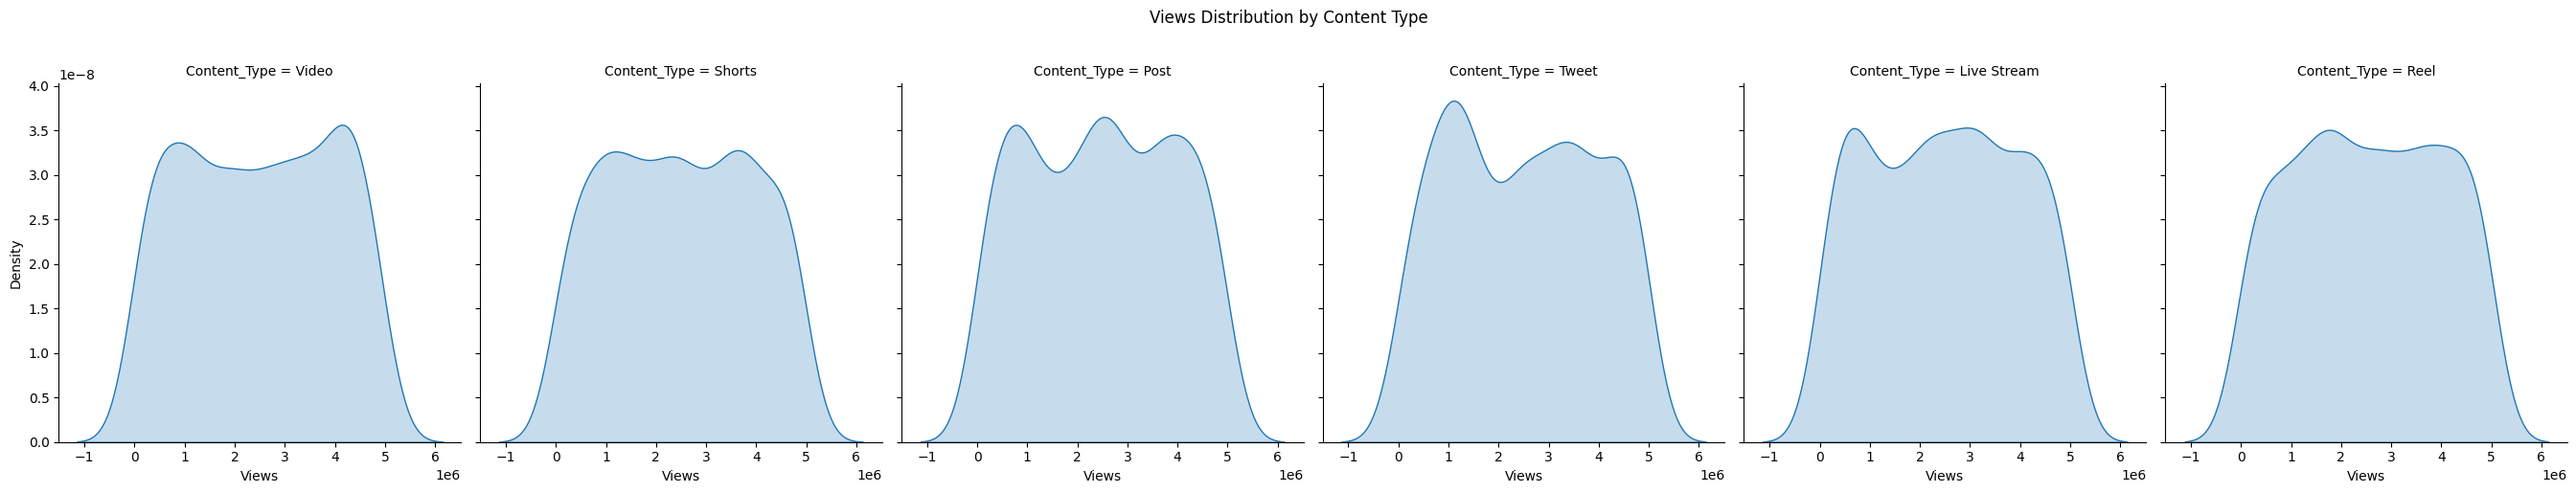

/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/p

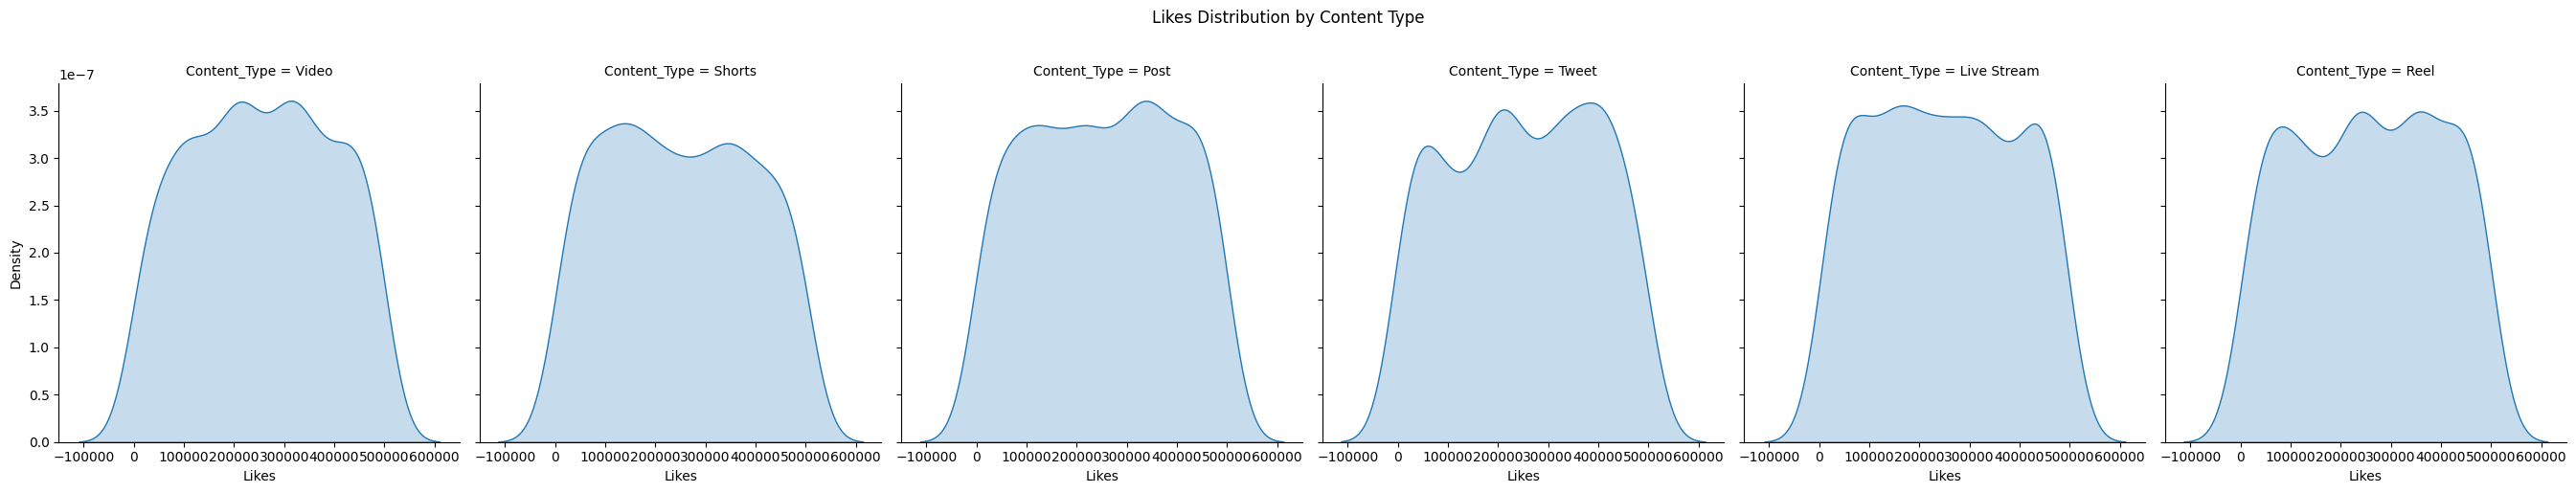

/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/p

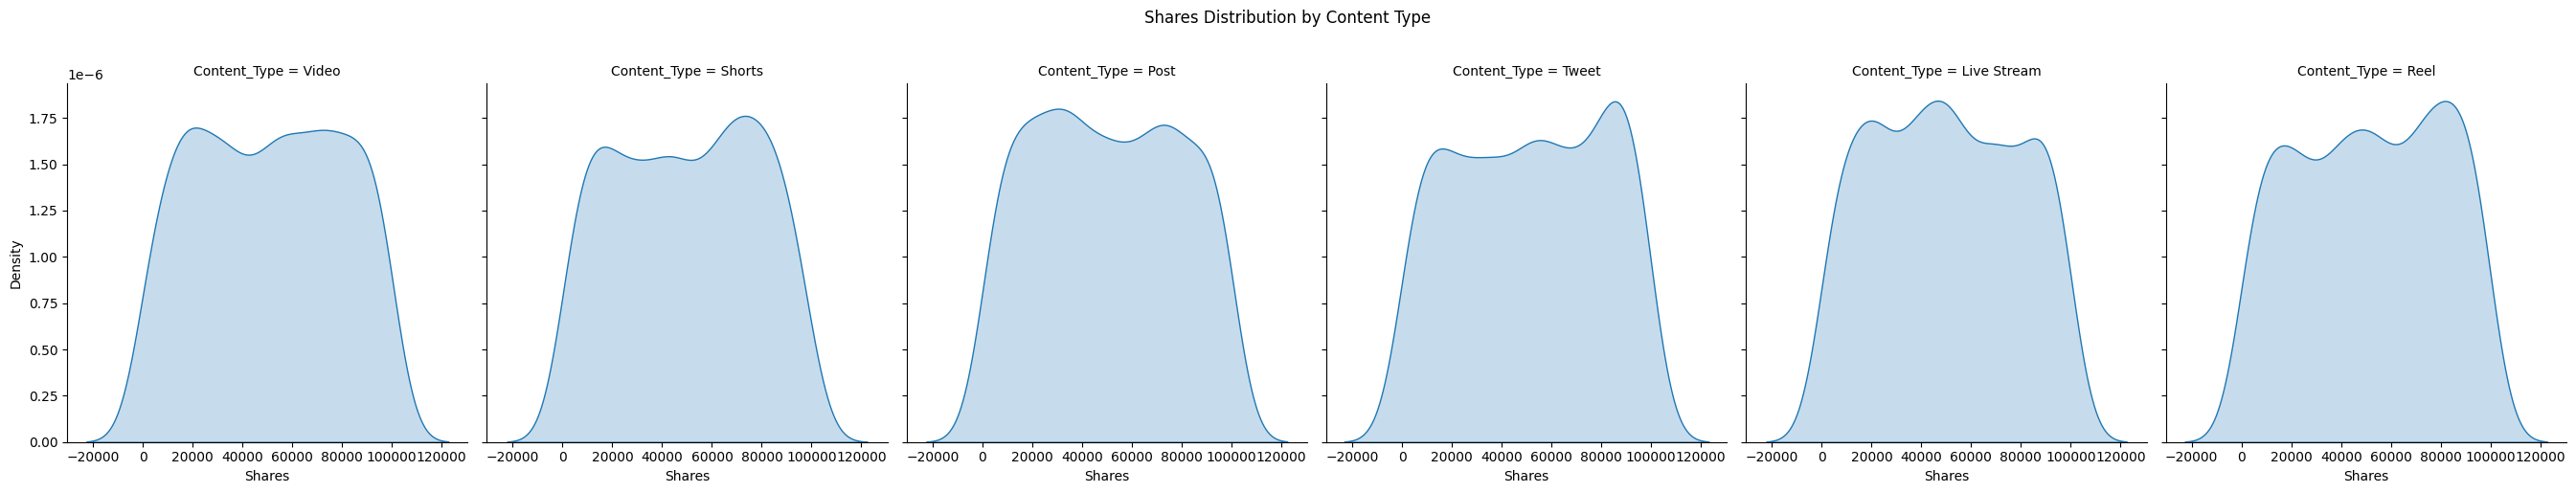

/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lupecovarrubias/opt/anaconda3/lib/p

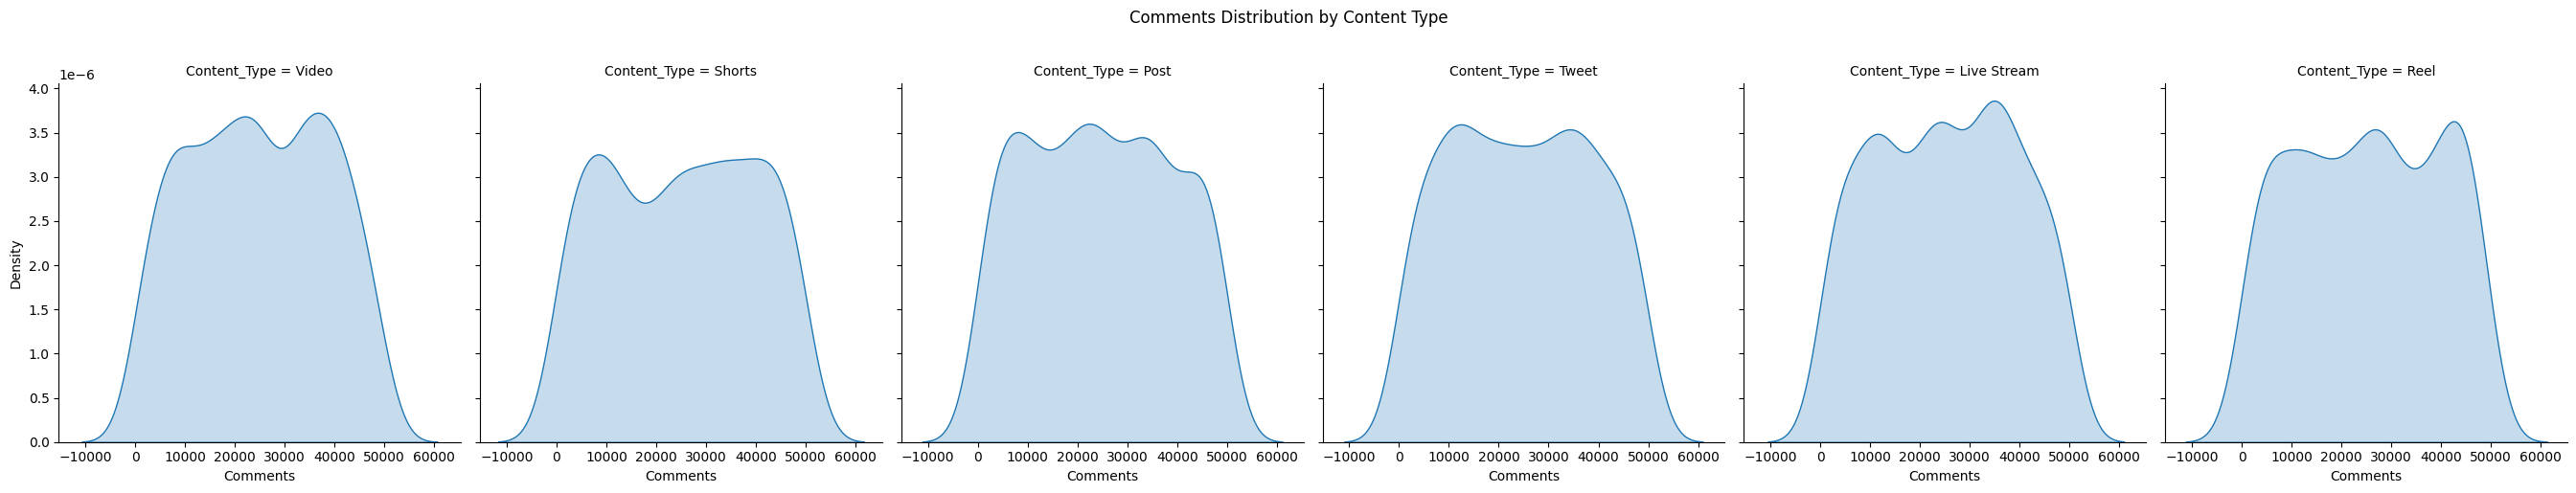

In [24]:
#KDE plot for each content type
for col in num_feat:
    sns.displot(df, x=col, col='Content_Type', kind='kde', fill=True, height=5, aspect=0.9)
    plt.suptitle(f'{col} Distribution by Content Type', y=1.02)
    plt.tight_layout()
    plt.show()

In the first row of plots we can see that videos and reels seem to have more consistent view ranges while posts and tweets show more variation (meaning there is diverse performance among those types of posts). Lastly, for views live streams are more evenly distributed but skewed meaning some may do well while others flop.
In terms of likes, tweets, videos, and reels have diverse performance for how many likes they get, while shorts, live streams, and posts have more consistent like ranges.
For shares videos, shorts, and posts have more consistent shares, while tweets, lives, and reels have diverse performance for shares, meaning it produces a wide range of outcomes rather than consistently high or low results.
Lastly for comment type engagements shorts and tweets are more consistent across all types of posts and videos, posts, tweets, lives, and reels have a wider range of outcomes in terms of how many comments a post may get. We can see that more posts get less comments and more live streams get more comments.

## Conclusion

The exploratory data analysis provided valuable insights into how different content characteristics and engagement metrics relate to overall engagement levels. We observed that while metrics like likes, shares, and comments vary across content types, none of the numerical features alone can fully distinguish between low, medium, and high engagement levels, highlighting the need for a multivariate approach. Additionally, categorical features such as platform, content type, and region exhibit distribution patterns that may influence engagement, but also show variability that suggests interaction effects with other features. Based on these findings, the next step will involve feature engineering to enhance the dataset for modeling. This will include deriving new variables such as engagement rates (e.g., likes per view, comments per view), one-hot encoding categorical variables, and potentially scaling numeric features. These steps will prepare the data for effective training of a multiclass classification model to predict engagement levels.